<a href="https://colab.research.google.com/github/yellowleather/LLM-Fundamentals/blob/main/Introduction_To_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Agents


This notebook is designed to introduce the concept of "agents" in the context of LangChain, a framework for developing applications powered by language models. It walks you through setting up the necessary environment and building a simple agent that can use tools to perform tasks.

# 1. Installation & Setup

## Setup and Installation

The first step is to install the necessary Python libraries. We will use `pip` to install the following packages:

* `langchainhub`: To access pre-built agent prompts and chains from the LangChain hub.
* `langchain-openai`: This library provides the interface to connect with OpenAI's language models, which will be the "brain" of our agent.
* `faiss-cpu`: A library for efficient similarity search and clustering of dense vectors. It's often used for agents that need to perform a vector search.
* `tavily-python`: This library provides a powerful search tool that the agent can use to find information from the web.

In [ ]:
%%time

# 🧹 Full clean install for LangChain (modern modular ecosystem)
!pip uninstall -y langchain langchain-core langchain-community langchain-openai langchainhub faiss-cpu > /dev/null
!pip install -q --upgrade pip setuptools wheel

# Install in sequence to avoid ResolutionImpossible
!pip install -q langchain-core==0.3.15
!pip install -q langchain==0.3.15
!pip install -q langchain-community==0.3.15
!pip install -q langchain-openai==0.2.11
!pip install -q langchainhub==0.1.15
!pip install -q faiss-cpu==1.8.0.post1
!pip install -q beautifulsoup4 jedi==0.19.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 68.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-text-splitters 0.3.11 requires langchain-core<2.0.0,>=0.3.75, but you have langchain-core 0.3.15 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but yo

In [ ]:
import os
os.kill(os.getpid(), 9)  # ♻️ clean restart


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain.chains.retrieval import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_community.vectorstores import FAISS
import os

# prompt = ChatPromptTemplate.from_template("Translate this to French: {text}")
# llm = ChatOpenAI(model="gpt-4o-mini")
# parser = StrOutputParser()
# chain = prompt | llm | parser
# print(chain.invoke({"text": "Hello, my friend!"}))

print("✅ LangChain modern API working perfectly!")


✅ LangChain modern API working perfectly!


# 2. API Key Setup
Enter API keys required for authenticating with OpenAI and Tavily service



In [ ]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPEN_AI_KEY_NEW')
print(f"OPENAI_API_KEY: {OPENAI_API_KEY[:7]} .....")
TAVILY_API_KEY = userdata.get('TAVILY_API_KEY')
print(f"TAVILY_API_KEY: {TAVILY_API_KEY[:7]} .....")
LANGCHAIN_API_KEY = userdata.get('LANGCHAIN_API_KEY')
print(f"LANGCHAIN_API_KEY: {LANGCHAIN_API_KEY[:7]} .....")

OPENAI_API_KEY: sk-proj .....
TAVILY_API_KEY: tvly-de .....
LANGCHAIN_API_KEY: lsv2_pt .....


In [ ]:
import os

In [ ]:
# Prompt the user to enter their OpenAI API key securely

# os.environ["OPENAI_API_KEY"] = getpass.getpass()
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
# Prompt for Tavily API key (for search tool)

# os.environ["TAVILY_API_KEY"] = getpass.getpass()
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY

# 3. Document Loading & Vector Store

Here, we load documentation from Langchain and process it so the agent can reference accurate information.

In [ ]:
# LangChain Imports: Imports LangChain components to build agents and tools.

from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader([
    "https://docs.smith.langchain.com/",
    "https://docs.langchain.com/langsmith/observability-quickstart",
    "https://docs.langchain.com/langsmith/evaluation-quickstart",
    "https://docs.langchain.com/langsmith/prompt-engineering-quickstart",
    "https://docs.langchain.com/langsmith/administration-overview"
    ])

docs = loader.load()

# 4. Embeddings & Indexing

In [ ]:
# Create embeddings using OpenAI models

from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

In [ ]:
# Split documents and store them in FAISS for efficient search

from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter(chunk_size=300)
documents = text_splitter.split_documents(docs)
vector = FAISS.from_documents(documents, embeddings)

In [ ]:
vector.similarity_search("apple", k=1)

[Document(id='d8f52be6-f7ab-40dc-95b3-b7e6e6b0f786', metadata={'source': 'https://docs.langchain.com/langsmith/administration-overview', 'title': 'Overview - Docs by LangChain', 'language': 'en'}, page_content='Organization ViewerOrganization UserOrganization Admin')]

In [ ]:
# Display split documents for verification
print(documents)

[Document(metadata={'source': 'https://docs.smith.langchain.com/', 'title': 'LangSmith docs - Docs by LangChain', 'language': 'en'}, page_content="LangSmith docs - Docs by LangChainSkip to main contentWe've raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangSmithSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangSmith docsGet startedObservabilityEvaluationPrompt"), Document(metadata={'source': 'https://docs.smith.langchain.com/', 'title': 'LangSmith docs - Docs by LangChain', 'language': 'en'}, page_content='the platform for agent engineering. Read more.Docs by LangChain home pageLangSmithSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationLangSmith docsGet startedObservabilityEvaluationPrompt engineeringDeploymentAgent BuilderPlatform setupOverviewPlansCreate an account and API keyAccount'), Document(metadata={'source': 'https://docs.smith.langchain.com/', 'title': 'LangSmith docs - Docs by LangChain',

# 5. Build Document & Retrieval Chains
Define how prompts and questions are structured, and create chains for document retrieval and response generation.

In [ ]:
# Create chain that feeds documents to an LLM with a specific prompt template

from langchain.chains.combine_documents import create_stuff_documents_chain
# create_stuff_documents_chain :
#  Create a chain for passing a list of Documents to a model.

llm = ChatOpenAI(api_key=os.environ["OPENAI_API_KEY"])
output_parser = StrOutputParser()

prompt = ChatPromptTemplate.from_template("""Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""", output_parser = output_parser)

document_chain = create_stuff_documents_chain(llm, prompt) # prompt | llm

# 6. Retriever & Agent Construction
Set up tools for searching and create an OpenAI-powered agent that can answer questions or retrieve information.

In [ ]:
# Initialize retriever and wrap in a retrieval chain
retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain)

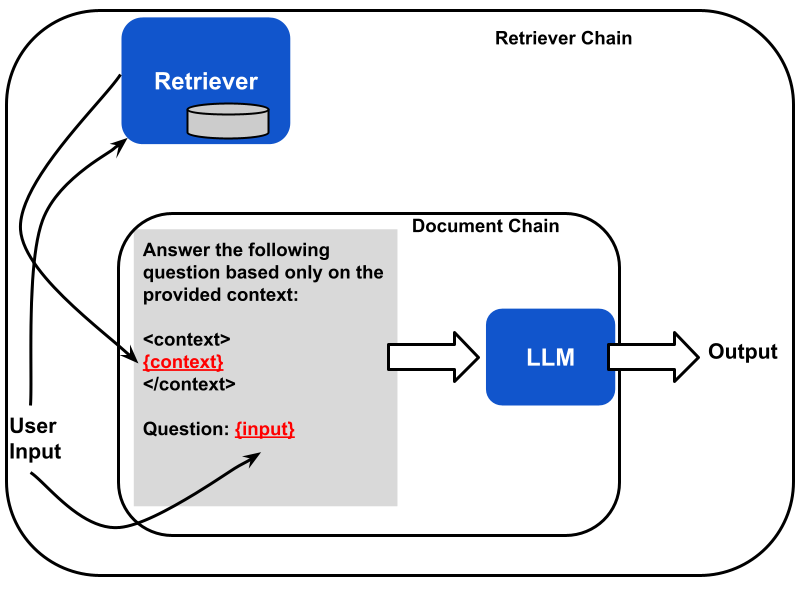

# 7. Tool Definitions
Define additional tools for tasks such as search, addition, multiplication, and exponentiation.

In [ ]:
# Import and define custom tools using decorators
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "langsmith_search",
    "Search for information about LangSmith. For any questions about LangSmith, you must use this tool! Like What can I use langsmith for?",
)

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults()

In [ ]:
tools = [retriever_tool, search]

# 8. Agent Execution
Combine all tools and prompts to enable intelligent question-answering using OpenAI Functions Agent.

In [ ]:
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY

In [ ]:
from langchain_openai import ChatOpenAI
from langchain import hub
from langchain.agents import create_openai_functions_agent
from langchain.agents import AgentExecutor

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent",
                  api_key=os.environ["LANGCHAIN_API_KEY"]
                  )

# You need to set OPENAI_API_KEY environment variable or pass it as argument `api_key`.
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
agent = create_openai_functions_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:
print(prompt)

input_variables=['agent_scratchpad', 'input'] optional_variables=['chat_history'] input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')]

In [ ]:
print(prompt.input_variables)
print(prompt.messages)

['agent_scratchpad', 'input']
[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}), MessagesPlaceholder(variable_name='chat_history', optional=True), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}), MessagesPlaceholder(variable_name='agent_scratchpad')]


In [ ]:
print(prompt.messages)

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}), MessagesPlaceholder(variable_name='chat_history', optional=True), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}), MessagesPlaceholder(variable_name='agent_scratchpad')]


In [ ]:
for msg in prompt.messages:
    print(msg)
    print("--------")

prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant') additional_kwargs={}
--------
variable_name='chat_history' optional=True
--------
prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}') additional_kwargs={}
--------
variable_name='agent_scratchpad'
--------


# 9. Example Usage & Outputs
Demonstrate how to ask questions to LangSmith or fetch general info (e.g., weather).

In [ ]:
result = agent_executor.invoke({"input": "What can I use langsmith for?"})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'What can I use LangSmith for?'}`


It helps you trace requests, evaluate outputs, test prompts, and manage deployments in one place.
LangSmith is framework agnostic, so you can use it with or without LangChain’s open-source libraries
langchain and langgraph.

For convenience, LangChain applications built with the LangSmith SDK has this capability built-in.

LangSmith is framework agnostic, so you can use it with or without LangChain’s open-source libraries
langchain and langgraph.
Prototype locally, then move to production with integrated monitoring and evaluation to build more reliable AI systems.

out to LangSmith Support with details about your applications throughput needs and sample code and we can work with you to better understand whether the best approach is fixing a bug, changes to your application code, or a different LangSmith plan.LangSmith can be used for the following purposes:
- Tracin

In [ ]:
print(result["output"])

LangSmith can be used for the following purposes:
- Tracing requests
- Evaluating outputs
- Testing prompts
- Managing deployments in one place
- It is framework agnostic, so you can use it with or without LangChain’s open-source libraries
- Prototype locally and then move to production with integrated monitoring and evaluation
- Build more reliable AI systems

If you have specific questions or need assistance with using LangSmith for a particular task, feel free to ask!


In [ ]:
result = agent_executor.invoke({"input": "what is the weather in SF?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in San Francisco'}`


[{'url': 'https://world-weather.info/forecast/usa/san_francisco/september-2025/', 'content': 'Add the current city\n\n Weather\n Archive\n Weather Widget\n\n World\n United States\n California\n Weather in San Francisco\n\n# Weather in San Francisco in September 2025\n\nSan Francisco Weather Forecast for September 2025 is based on statistical data.\n\n201520162017201820192020202120222023202420252026\n\nJanFebMarAprMayJunJulAugSepOctNovDec\n\n  \n\n## September\n\nStart Week On\n\n Sun\n Mon\n Tue\n Wed\n Thu\n Fri\n Sat\n\n +73°\n\n  20.8 mph W 29.8 inHg53 %06:40 am07:38 pm\n +72°\n\n  +59° [...] +68°\n\n  +63°\n\n  15.2 mph W 29.8 inHg74 %06:54 am07:12 pm\n 19\n\n  +70°\n\n  +61°\n\n  16.3 mph W 29.9 inHg69 %06:55 am07:11 pm\n 20\n\n  +68°\n\n  +63°\n\n  21 mph W 29.9 inHg69 %06:56 am07:09 pm\n 21\n\n  +68°\n\n  +61°\n\n  17.7 mph W 29.8 inHg67 %06:57 am07:07 

In [ ]:
print(result["output"])

The weather in San Francisco for September 2025 shows an average temperature of around 71°F during the day and 62°F at night. The weather is mostly sunny with some cloudy days. The humidity levels are around 83%, and there is minimal precipitation. The wind speed ranges from 0 to 40 mph, with varying directions. If you need more detailed information, you can visit [this link](https://world-weather.info/forecast/usa/san_francisco/september-2025/).


In [ ]:
result = agent_executor.invoke({"input": "how to do RecursiveCharacterTextSplitter"})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'RecursiveCharacterTextSplitter'}`


prompt settingsUse tools in a promptInclude multimodal content in a promptWrite your prompt with AIConnect to modelsTutorialsOptimize a classifierSync prompts with GitHubTest multi-turn conversationsEnglishcloseOn this pagePrerequisitesNext stepsVideo guidePrompt engineering quickstartCopy pageCopy

to modelsTutorialsOptimize a classifierSync prompts with GitHubTest multi-turn conversationsEnglishcloseOn this pagePrerequisitesNext stepsVideo guidePrompt engineering quickstartCopy pageCopy pagePrompts guide the behavior of large language models (LLM). Prompt engineering is the process of

LangSmith lets you set two different monthly limits, mirroring our Billable Metrics discussed in the aforementioned data retention guide:

For convenience, LangChain applications built with the LangSmith SDK has this capability built-in.The LangSmith search did not provide specific

In [ ]:
result = agent_executor.invoke({"input": "What is my name?"})



> Entering new AgentExecutor chain...
I'm sorry, but I don't have access to your personal information. How can I assist you today?

> Finished chain.


# 10. Custom Arithmetic Tools

In [ ]:
from langchain_core.tools import tool

Sample implementations of addition, multiplication, and exponentiation as callable agent tools.

In [ ]:
## Add two more tools that perform addition and exponentiation
@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int


@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent

In [ ]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two integers together.
{'first_int': {'title': 'First Int', 'type': 'integer'}, 'second_int': {'title': 'Second Int', 'type': 'integer'}}


In [ ]:
multiply.invoke({"first_int": 4, "second_int": 5})

20

In [ ]:
from langchain.tools.render import render_text_description

rendered_tools = render_text_description([multiply])
print(rendered_tools)

multiply(first_int: int, second_int: int) -> int - Multiply two integers together.
